In [1]:
from __future__ import division, print_function

import time
import os
import subprocess

import numpy as np
import matplotlib.pyplot as plt

#import sncosmo
from astropy.table import Table

# Used to normalise features
from sklearn.preprocessing import StandardScaler 
# Used for hyperparameter optimisation and to avoid overfitting
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

# Some example algorithms you can try using (sklearn has many more)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib nbagg

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## 1. Split into training and test sets

What's a reasonable choice here for how much data should go into your test set? What are you going to do to ensure you don't overfit?

In [9]:
!ls

lab_Supernova_SKlearn.key            supernova_tutorial_complete.ipynb
labels.txt                           supernova_tutorial_suggestions.ipynb
salt2_features.txt


In [7]:
data[:7,:]

test = np.loadtxt('labels.txt')  
print(test.shape)
test[:9,:]

(2000, 2)


array([[0., 2.],
       [1., 3.],
       [2., 2.],
       [3., 2.],
       [4., 2.],
       [5., 1.],
       [6., 2.],
       [7., 1.],
       [8., 1.]])

In [2]:
data = np.loadtxt('salt2_features.txt')
data.shape
data
import pandas as pd
df = pd.DataFrame(data,index=data[:,0])
print(df.describe())
#preprocessing
from sklearn import preprocessing
data
data = data[:,1:]
data = preprocessing.scale(data)

                 0            1            2            3            4  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    999.500000     0.645863    21.797297     0.000009     0.565144   
std     577.494589     0.265181    58.386963     0.000041     2.110899   
min       0.000000     0.010000  -100.000000    -0.001000    -3.000000   
25%     499.750000     0.481954   -16.693307     0.000002    -1.017718   
50%     999.500000     0.663346    50.679465     0.000004     0.290362   
75%    1499.250000     0.784232    63.295040     0.000008     2.999995   
max    1999.000000     1.500000   100.000000     0.000943     3.000000   

                 5  
count  2000.000000  
mean     -0.018130  
std       0.283636  
min      -0.500000  
25%      -0.226682  
50%      -0.041522  
75%       0.177621  
max       0.500000  


In [10]:
import pandas as pd
df = pd.DataFrame(data,index=data[:,0])
df.describe()

,0,1,2,3,4
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,3.992112e-15,-6.674106e-16,3.339273e-16,-1.235678e-16,7.727152e-17
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-2.398444e+00,-2.086558e+00,-2.462544e+01,-1.689345e+00,-1.699328e+00
25%,-6.182551e-01,-6.593977e-01,-1.741902e-01,-7.500397e-01,-7.354645e-01
50%,6.594594e-02,4.947918e-01,-1.337519e-01,-1.302056e-01,-8.249276e-02
75%,5.219209e-01,7.109142e-01,-1.678228e-02,1.153755e+00,6.903196e-01
max,3.221764e+00,1.339721e+00,2.278955e+01,1.153757e+00,1.827199e+00


## 2. Scale the features
What algorithm are you planning on using? Does it require you scale the features in any way?

In [4]:
X_train = data[0:1600,1:]
X_train.shape
X_val= data[1600:,1:]
X_val.shape

(400, 4)

## 3. Choose a machine learning algorithm and train

In [17]:
labels = np.loadtxt('labels.txt')
labels.shape
labels[:10,1]

array([2., 3., 2., 2., 2., 1., 2., 1., 1., 2.])

In [10]:
labels = np.loadtxt('labels.txt')
labels.shape
y_train= labels[0:1600,1]
y_val= labels[1600:,1]
#report to binary
y_val[y_val==1] = 0
y_train[y_train==1] = 0
y_val[y_val>1] = 1
y_train[y_train>1] = 1

#try with SVM
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
test = 1
for i in range (5):
    if test == 1:
        clf = svm.SVC(kernel='rbf', gamma ='scale',  coef0=0.2, C= 10)
    if test == 2:
        clf = svm.SVC(kernel='rbf', gamma ='scale',  coef0=0.4, C= 8)

    if test == 3:
        clf = svm.SVC(kernel='rbf',gamma ='scale',  coef0=2.2, C= 20)

    if test == 4:
        clf = svm.SVC(kernel='rbf',gamma ='scale',  coef0=-0.8, C= 1)
        
    if test == 5:
        clf = svm.SVC(kernel='rbf', gamma ='scale')    


    clf.fit(X_train, y_train)
    prediction=clf.predict(X_val)  

    #print ('prediction ', prediction)

    acc = accuracy_score(prediction,y_val)
    acc
    print ('accuracy is = ', acc)
    #precition and recall
    pr = precision_score(y_val, prediction)
    print ('precision is = ', pr)
    rc = recall_score(y_val, prediction)
    print('recall is = ', rc)
    f1 = f1_score(y_val, prediction)
    print('f1 is = ', f1)
    test +=1

accuracy is =  0.8025
precision is =  0.8588588588588588
recall is =  0.89937106918239
f1 is =  0.8786482334869431
accuracy is =  0.8025
precision is =  0.8588588588588588
recall is =  0.89937106918239
f1 is =  0.8786482334869431
accuracy is =  0.81
precision is =  0.8622754491017964
recall is =  0.9056603773584906
f1 is =  0.883435582822086
accuracy is =  0.8075
precision is =  0.8662613981762918
recall is =  0.8962264150943396
f1 is =  0.8809891808346213
accuracy is =  0.8075
precision is =  0.8662613981762918
recall is =  0.8962264150943396
f1 is =  0.8809891808346213


## 5. Compute the accuracy, precision and recall of your classified objects

In [201]:
#precition and recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pr = precision_score(y_val, prediction)
print ('precision is = ', pr)
rc = recall_score(y_val, prediction)
print('recall is = ', rc)
f1 = f1_score(y_val, prediction)
print('f1 is = ', f1)

accuracy is =  0.8075
precision is =  0.866261398176
recall is =  0.896226415094
f1 is =  0.880989180835


In [227]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_val, prediction)
print ('auc = ', auc )

fpr, tpr, th = roc_curve(y_val, prediction)
plt.plot(fpr, tpr)
plt.show()
th

auc =  0.67982052462


array([ 2.,  1.,  0.])

## 6. Choose another machine learning algorithm 

In [11]:
# Here we try a random forest
#from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
#clf = RandomForestClassifier(max_depth=30, random_state=0, bootstrap=True, criterion='entropy')
clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=20, max_depth=5)
clf.fit(X_train, y_train)
prediction=clf.predict(X_val)
acc = accuracy_score(prediction,y_val)
print ('accuracy is = ', acc)

#report to binary
#prediction[prediction==1] = 0
#y_val[y_val==1] = 0
#prediction[prediction>1] = 1
#y_val[y_val>1] = 1


#precition and recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pr = precision_score(y_val, prediction)
print ('precision is = ', pr)
rc = recall_score(y_val, prediction)
print('recall is = ', rc)
f1 = f1_score(y_val, prediction)
print('f1 is = ', f1)

accuracy is =  0.84
precision is =  0.8757396449704142
recall is =  0.9308176100628931
f1 is =  0.9024390243902439


## 6. A better metric - create a ROC curve for your classified supernovae, with Ia as the positive class
#You'll need to go back and predict the probability for each object being a Ia. You can then use sklearn's `roc_curve` #and `roc_auc_score` functions. Beware: these will expect a binary classification...

auc =  0.85563353275


<IPython.core.display.Javascript object>


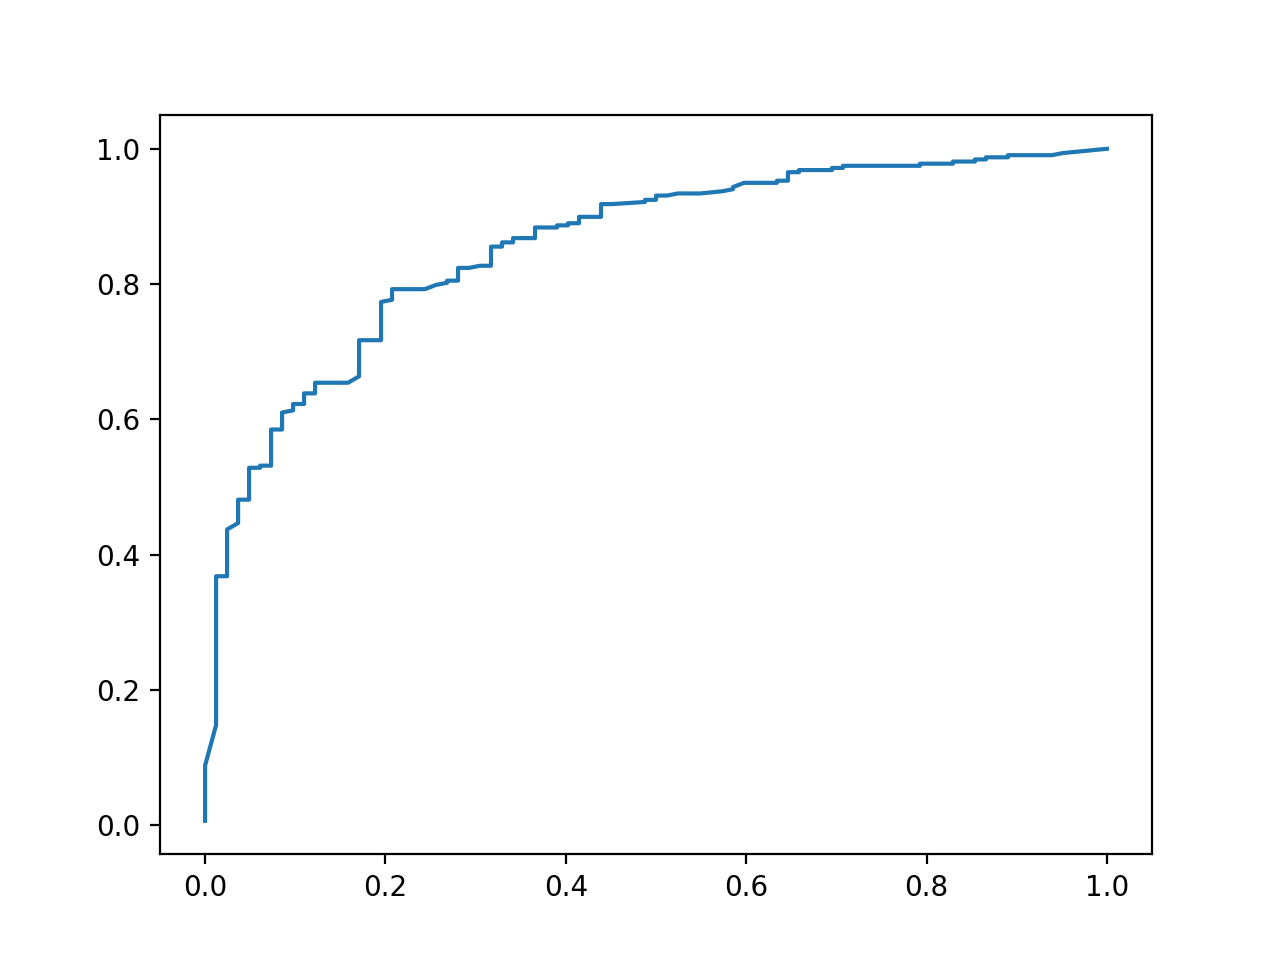

In [260]:
from sklearn.metrics import roc_auc_score
prediction=clf.predict_proba(X_val) 
prediction = prediction[:,1]
auc = roc_auc_score(y_val, prediction)
print ('auc = ', auc )

fpr, tpr, th = roc_curve(y_val, prediction)
plt.plot(fpr, tpr)

## 7. What's the best you can get?
I can get an AUC of around 0.93 for this dataset. Try to see if you can beat that! Try different algorithms and hyperparameters. Think about optimising the hyperparameters, what metric should you be optimising for? Just ensure you always keep aside a test set (and maybe try different test sets) to avoid overfitting.